In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./datasets/train_norm_full.csv")
val = pd.read_csv("./datasets/val_norm_full.csv")
test = pd.read_csv("./datasets/test_norm_full.csv")

In [3]:
full_df = pd.concat([test, val, train], ignore_index=True)

In [4]:
center_distribution = pd.DataFrame(full_df["StudySubjectID"].value_counts())
center_distribution["label"] = center_distribution.index.values
center_distribution["label"] = center_distribution["label"] + center_distribution["StudySubjectID"].apply(lambda s: f": n={s}")
center_distribution

,StudySubjectID,label
ANT,80,ANT: n=80
AMC,69,AMC: n=69
LUM,60,LUM: n=60
AZM,58,AZM: n=58
RIJ,53,RIJ: n=53
MCH,50,MCH: n=50


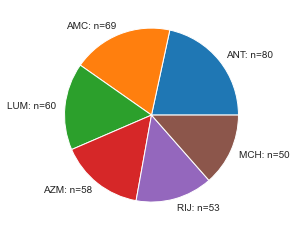

In [5]:
plt.pie(x=center_distribution.StudySubjectID, labels=center_distribution.label)

plt.savefig("./fig/center_dist.png")

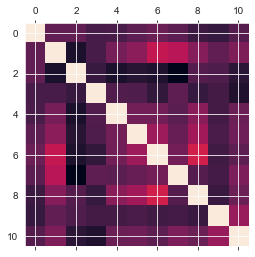

In [6]:
plt.matshow(full_df.corr())
plt.show()

In [7]:
full_df.corr()

,female,age,r_ivtrom,intra_arterial_treatment,b_pvstr,b_pvdm,b_pvrr,b_pvaf,b_pvhc,nihsco_abl_c,mrs_d90d_c
female,1.000000,0.066900,0.066729,-0.011263,-0.008718,0.056358,0.093335,0.050285,-0.045478,-0.065681,0.026499
age,0.066900,1.000000,-0.154688,-0.010547,0.128607,0.190713,0.352126,0.317740,0.173539,0.065903,0.152468
r_ivtrom,0.066729,-0.154688,1.000000,-0.059361,-0.153361,-0.114627,-0.145112,-0.249475,0.031298,0.005841,-0.099321
intra_arterial_treatment,-0.011263,-0.010547,-0.059361,1.000000,0.017091,0.010120,-0.081428,0.060938,-0.068238,-0.029657,-0.140692
b_pvstr,-0.008718,0.128607,-0.153361,0.017091,1.000000,0.118953,0.120553,0.047522,0.183678,-0.029258,0.095394
b_pvdm,0.056358,0.190713,-0.114627,0.010120,0.118953,1.000000,0.242180,0.086815,0.256473,-0.006905,0.106998
b_pvrr,0.093335,0.352126,-0.145112,-0.081428,0.120553,0.242180,1.000000,0.125466,0.401823,-0.037068,0.055330
b_pvaf,0.050285,0.317740,-0.249475,0.060938,0.047522,0.086815,0.125466,1.000000,0.024605,-0.024325,0.142366
b_pvhc,-0.045478,0.173539,0.031298,-0.068238,0.183678,0.256473,0.401823,0.024605,1.000000,-0.054735,0.097043
nihsco_abl_c,-0.065681,0.065903,0.005841,-0.029657,-0.029258,-0.006905,-0.037068,-0.024325,-0.054735,1.000000,0.227014


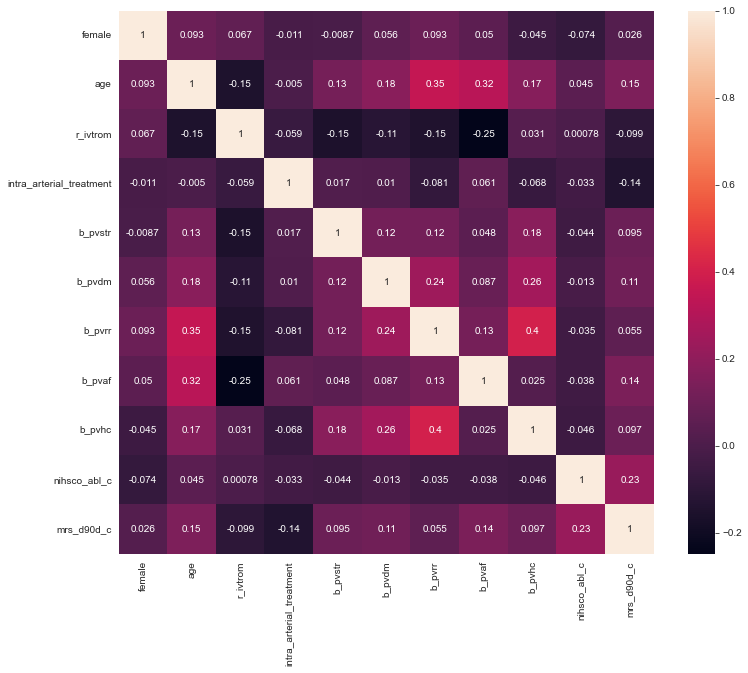

In [18]:
plt.figure(figsize=(12, 10))
corr_method = "spearman"
sns.heatmap(full_df.corr(method=corr_method), annot=True);
plt.savefig(f"./correlation-{corr_method}.png")

TypeError: 'str' object is not callable

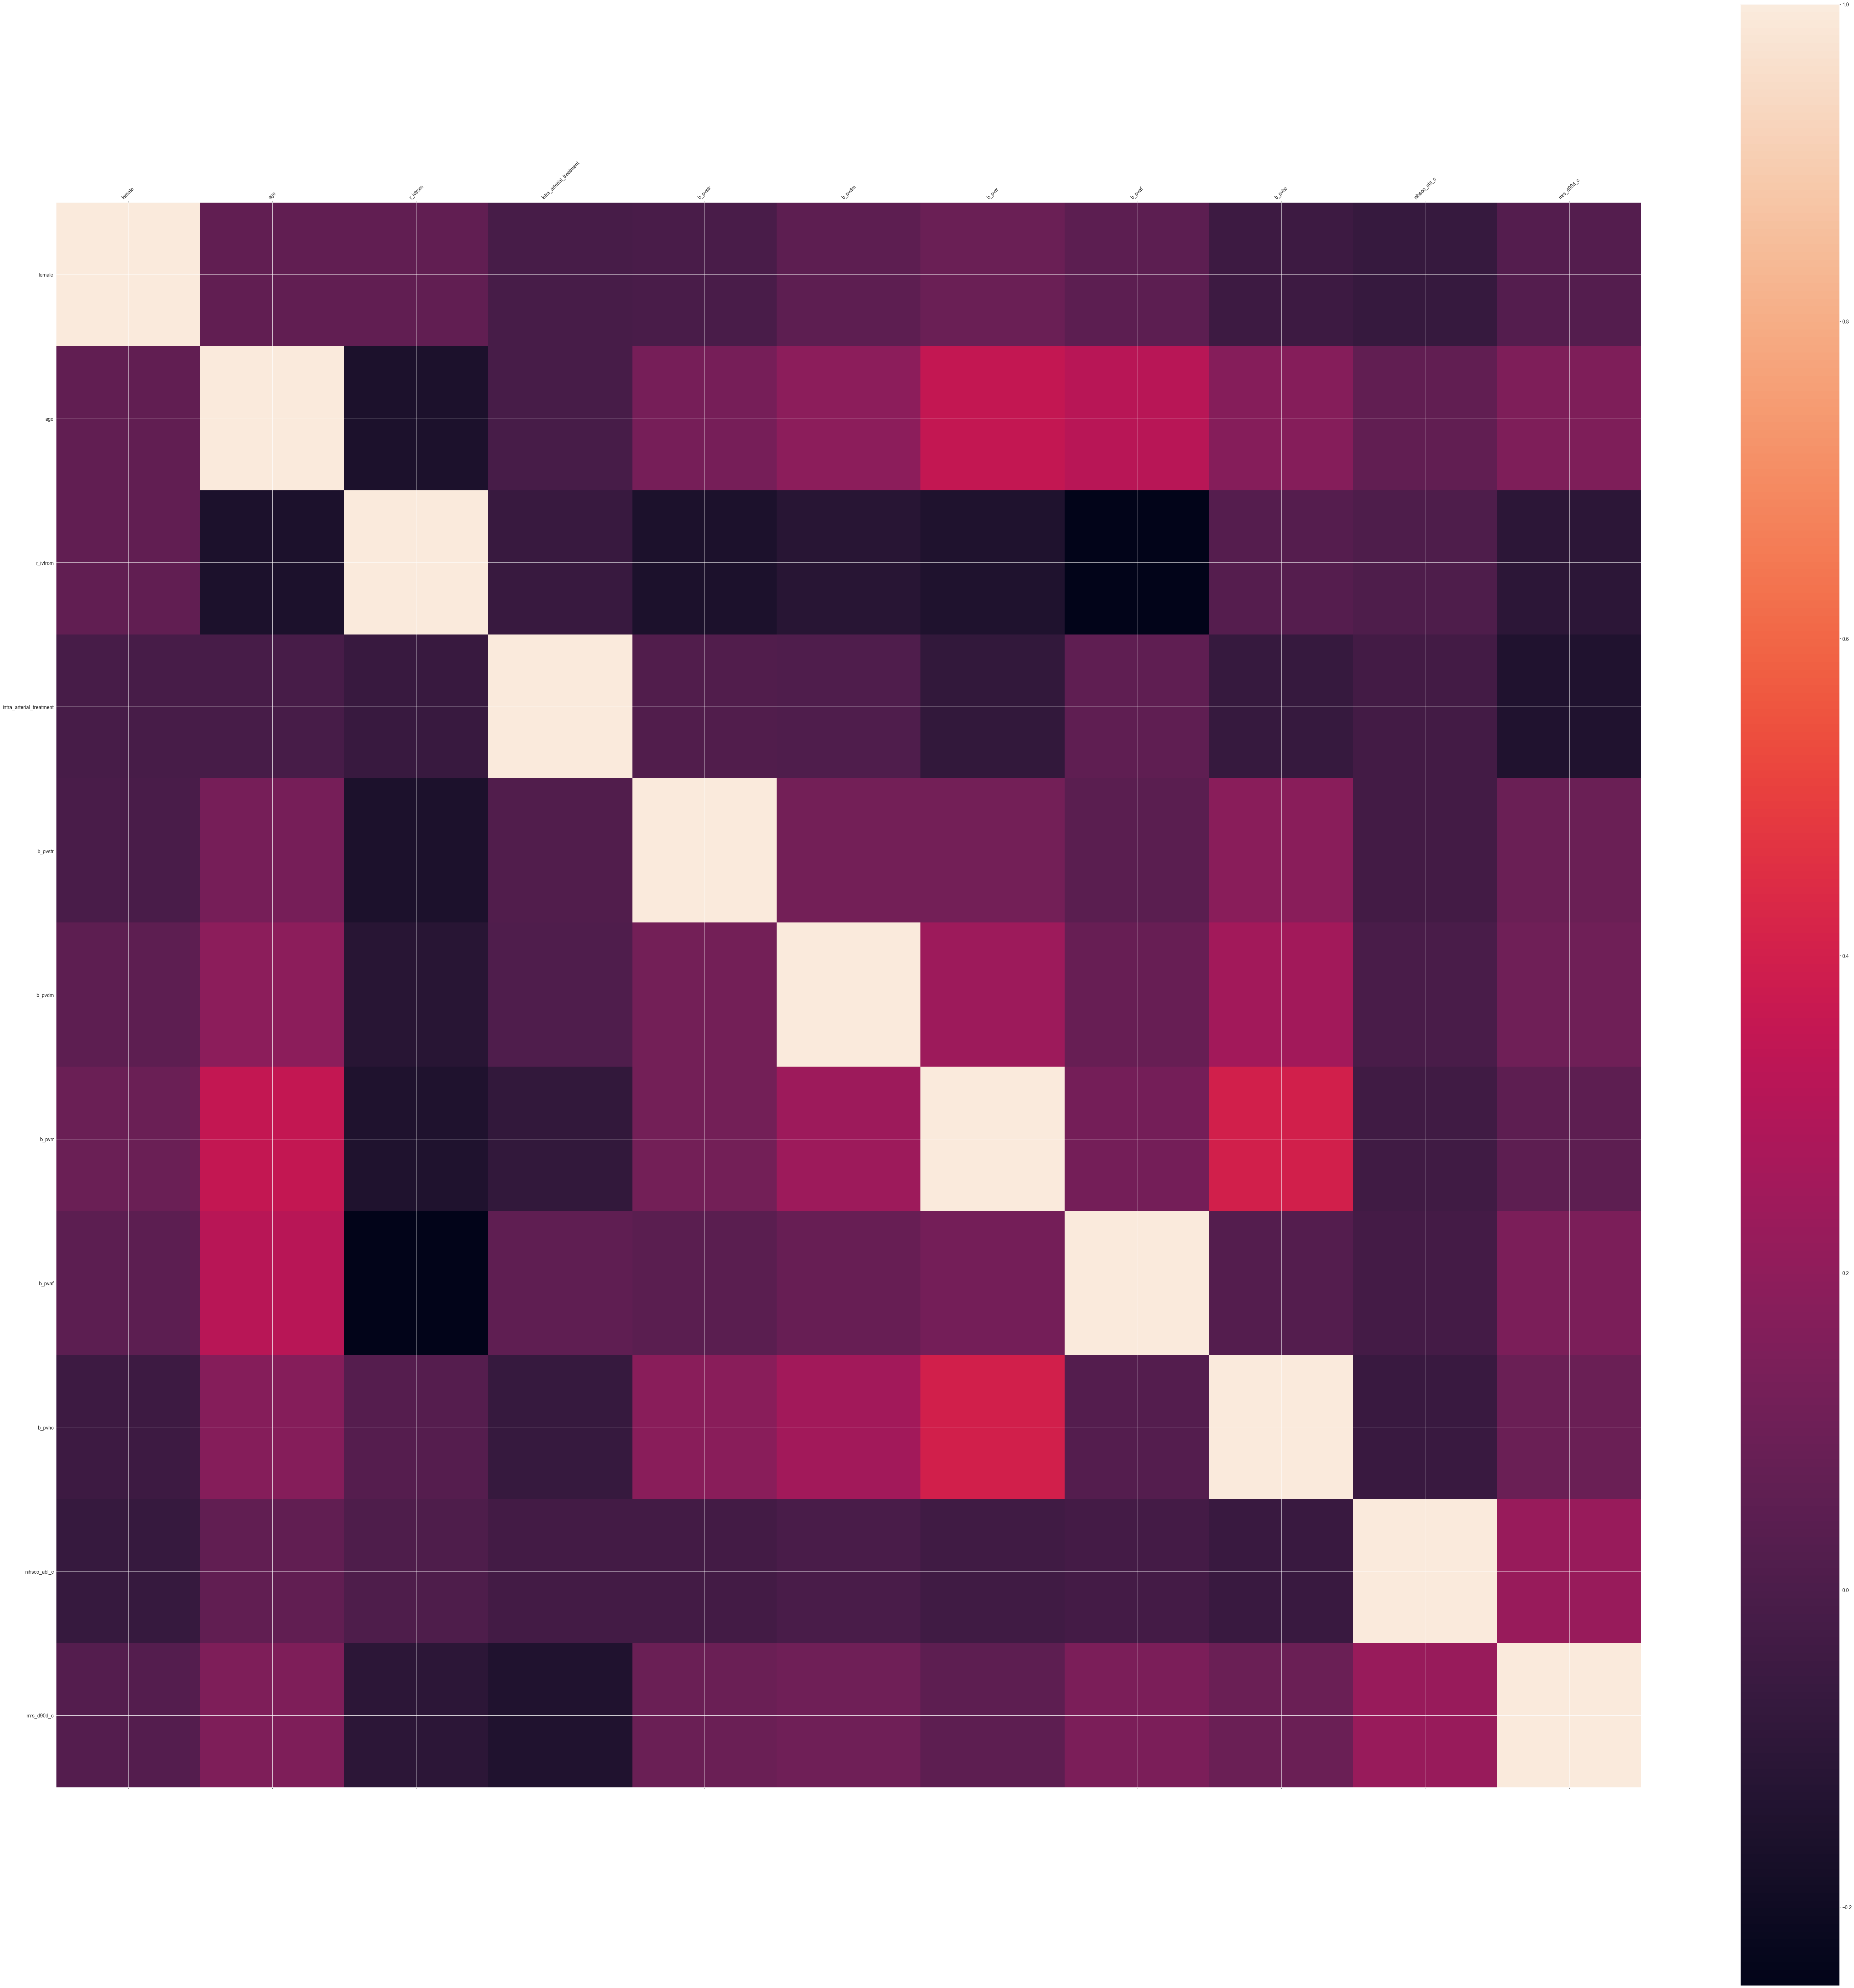

In [78]:
f = plt.figure(figsize=(100, 100))
plt.matshow(full_df.corr(), fignum=f.number)
plt.xticks(range(full_df.select_dtypes(['number']).shape[1]), full_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(full_df.select_dtypes(['number']).shape[1]), full_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [82]:
def plot_feature_full(df, feature_name):
    val_counts = df[feature_name].value_counts()
    pie_plot(val_counts.values, val_counts.index, f"distribution_full_{feature_name}")

def plot_feature_center(df, feature_name, center):
    if center == "full":
        sub_set = df
    else:
        sub_set = df[df["StudySubjectID"] == center]

    val_counts = sub_set[feature_name].value_counts()

    df_temp = pd.DataFrame(val_counts)
    df_temp["connector"] = "; n="
    df_temp["Label"] = df_temp.index.values.astype(str) + df_temp["connector"] + df_temp.iloc[:, 0].astype(str)


    pie_plot(df_temp.iloc[:, 0], df_temp["Label"], f"distribution_{center}_{feature_name}")



def pie_plot(x, y, filename):
    plt.pie(x=x, labels=y)
    plt.
    plt.title(f"Feature {filename}")
    plt.savefig(f"./fig/features/{filename}.png")
    plt.clf()



def plot_all_features(df):
    feature_list = ['female',
                   # 'age',
                    'r_ivtrom',
                    'intra_arterial_treatment',
                    'b_pvstr',
                    'b_pvdm',
                    'b_pvrr',
                    'b_pvaf',
                    'b_pvhc',
                 #   'nihsco_abl_c',
                 #   'StudySubjectID',
                    'mrs_d90d_c']

    center_list = full_df["StudySubjectID"].value_counts().index.to_list()

    for feature in feature_list:
        # plot for all
        plot_feature_center(df, feature, "full")

        # plot for all centers
        for center in center_list:
            plot_feature_center(df, feature, center)




In [ ]:
full_df["StudySubjectID"].value_counts().index.to_list()

TypeError: 'str' object is not callable

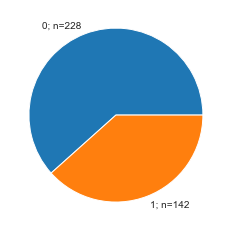

In [83]:
plot_all_features(full_df)

In [ ]:
full_df.columns.tolist()

In [ ]:
#label_df.Label.astype(str) +  " ; n = " +  count_df["Count"].astype(str)

In [ ]:
val_c = full_df["b_pvaf"].value_counts()
df_xyz = pd.DataFrame(val_c)
df_xyz["connector"] = "; n="
df_xyz["Label"] = df_xyz.index.values.astype(str) + df_xyz["connector"] + df_xyz.iloc[:, 0].astype(str)
df_xyz

In [37]:
full_df.columns.to_list()

['female',
 'age',
 'r_ivtrom',
 'intra_arterial_treatment',
 'b_pvstr',
 'b_pvdm',
 'b_pvrr',
 'b_pvaf',
 'b_pvhc',
 'nihsco_abl_c',
 'StudySubjectID',
 'mrs_d90d_c']

In [ ]:
df_xyz

In [ ]:
df_xyz.iloc[:, 0]

In [10]:
import seaborn as sns

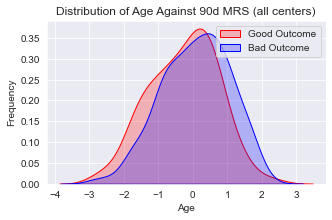

<Figure size 432x288 with 0 Axes>

In [14]:
# tenure distibution
fig, ax=plt.subplots(1,1,figsize=(5,3))
g = sns.kdeplot(full_df.age[(full_df.mrs_d90d_c == 0) ], color="Red", shade=True)
g = sns.kdeplot(full_df.age[(full_df.mrs_d90d_c == 1) ], ax=g, color="Blue", shade=True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
plt.title('Distribution of Age Against 90d MRS (all centers)')
g = g.legend(["Good Outcome","Bad Outcome"])
plt.savefig(f"./fig/cat-features/full-age.png",facecolor="white", pad_inches=0.3, bbox_inches="tight")
plt.show()
plt.clf()

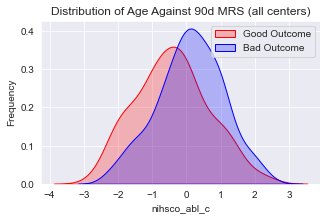

<Figure size 432x288 with 0 Axes>

In [6]:
# tenure distibution
fig, ax=plt.subplots(1,1,figsize=(5,3))
g = sns.kdeplot(full_df.nihsco_abl_c[(full_df.mrs_d90d_c == 0) ], color="Red", shade=True)
g = sns.kdeplot(full_df.nihsco_abl_c[(full_df.mrs_d90d_c == 1) ], ax=g, color="Blue", shade=True)
g.set_xlabel("nihsco_abl_c")
g.set_ylabel("Frequency")
plt.title('Distribution of Age Against 90d MRS (all centers)')
g = g.legend(["Good Outcome","Bad Outcome"])
plt.savefig(f"./fig/cat-features/full-nihss.png",facecolor="white", pad_inches=0.3, bbox_inches="tight")
plt.show()
plt.clf()

In [12]:
def plot_conti_features():

    for center in BIGGEST_CENTERS:
        print("center", center)

        fig, ax=plt.subplots(1,1,figsize=(5,3))
        g = sns.kdeplot(full_df.nihsco_abl_c[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ], color="Red", shade=True)
        g = sns.kdeplot(full_df.nihsco_abl_c[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ], ax=g, color="Blue", shade=True)
        g.set_xlabel("nihsco_abl_c")
        g.set_ylabel("Frequency")
        plt.title(f'Distribution of Age Against 90d MRS for {center}')
        g = g.legend(["Good Outcome","Bad Outcome"])
        plt.savefig(f"./fig/cat-features/nihss-{center}.png",facecolor="white", pad_inches=0.3, bbox_inches="tight")
        plt.clf()

        fig, ax=plt.subplots(1,1,figsize=(5,3))
        g = sns.kdeplot(full_df.age[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ], color="Red", shade=True)
        g = sns.kdeplot(full_df.age[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ], ax=g, color="Blue", shade=True)
        g.set_xlabel("Age")
        g.set_ylabel("Frequency")
        plt.title(f'Distribution of Age Against 90d MRS for {center}')
        g = g.legend(["Good Outcome","Bad Outcome"])
        plt.savefig(f"./fig/cat-features/age-{center}.png",facecolor="white", pad_inches=0.3, bbox_inches="tight")
        plt.clf()

In [13]:
plot_conti_features()

center ANT
center AMC
center LUM
center AZM
center RIJ
center MCH


<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

<Figure size 360x216 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import matplotlib.pyplot as plt

X = ['female',
     'r_ivtrom',
     'intra_arterial_treatment',
     'b_pvstr',
     'b_pvdm',
     'b_pvrr',
     'b_pvaf',
     'b_pvhc',]
zeros = [full_df.female[(full_df.mrs_d90d_c == 0) ].value_counts()[0],
         full_df.r_ivtrom[(full_df.mrs_d90d_c == 0) ].value_counts()[0],
         full_df.intra_arterial_treatment[(full_df.mrs_d90d_c == 0) ].value_counts()[0],
         full_df.b_pvstr[(full_df.mrs_d90d_c == 0) ].value_counts()[0],
         full_df.b_pvdm[(full_df.mrs_d90d_c == 0) ].value_counts()[0],
         full_df.b_pvrr[(full_df.mrs_d90d_c == 0) ].value_counts()[0],
         full_df.b_pvaf[(full_df.mrs_d90d_c == 0) ].value_counts()[0],
         full_df.b_pvhc[(full_df.mrs_d90d_c == 0) ].value_counts()[0]
         ]
ones = [full_df.female[(full_df.mrs_d90d_c == 1) ].value_counts()[1],
        full_df.r_ivtrom[(full_df.mrs_d90d_c == 1) ].value_counts()[1],
        full_df.intra_arterial_treatment[(full_df.mrs_d90d_c == 1) ].value_counts()[1],
        full_df.b_pvstr[(full_df.mrs_d90d_c == 1) ].value_counts()[1],
        full_df.b_pvdm[(full_df.mrs_d90d_c == 1) ].value_counts()[1],
        full_df.b_pvrr[(full_df.mrs_d90d_c == 1) ].value_counts()[1],
        full_df.b_pvaf[(full_df.mrs_d90d_c == 1) ].value_counts()[1],
        full_df.b_pvhc[(full_df.mrs_d90d_c == 1) ].value_counts()[1]
        ]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, zeros, 0.4, label = '1')
plt.bar(X_axis + 0.2, ones, 0.4, label = '0')

plt.xticks(X_axis, X)
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of elements in feature")
plt.title("Number of elements in each feature")
plt.legend()

plt.savefig(f"./fig/bin-features/full.png",facecolor="white", pad_inches=0.3, bbox_inches="tight")
plt.clf()

<Figure size 432x288 with 0 Axes>

In [79]:
def dist_binary(df, feature, center):
    sns.set_palette("tab10")
    fig, ax=plt.subplots(1,1,figsize=(5,3))
    g = sns.displot(df[df.StudySubjectID == center], x=feature, hue="mrs_d90d_c",  stat="probability", common_norm=False)

    #g.set_xlabel(f"{feature}")
    #g.set_ylabel("Frequency")
    plt.title(f'Distribution of {feature} Against 90d MRS for {center}')
    #g = g.legend(["MRS 90d","Bad Outcome"])
    plt.savefig(f"./fig/bin-features/{feature}-{center}.png",facecolor="white", pad_inches=0.3, bbox_inches="tight")
    plt.clf()
    plt.show()

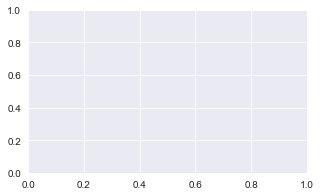

<Figure size 423.375x360 with 0 Axes>

In [80]:
dist_binary(full_df, "female", "AZM")

In [9]:
BIGGEST_CENTERS = ["ANT",
                   "AMC",
                   "LUM",
                   "AZM",
                   "RIJ",
                   "MCH"]

feature_names = ['female',
                 'r_ivtrom',
                 'intra_arterial_treatment',
                 'b_pvstr',
                 'b_pvdm',
                 'b_pvrr',
                 'b_pvaf',
                 'b_pvhc']

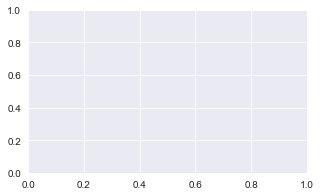

<Figure size 423.375x360 with 0 Axes>

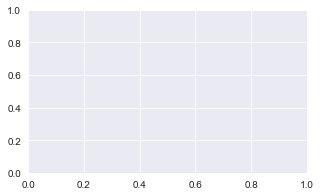

<Figure size 423.375x360 with 0 Axes>

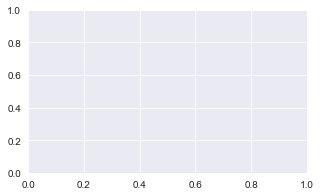

<Figure size 423.375x360 with 0 Axes>

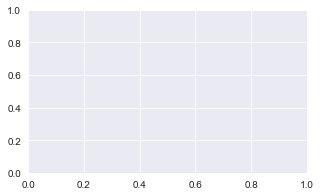

<Figure size 423.375x360 with 0 Axes>

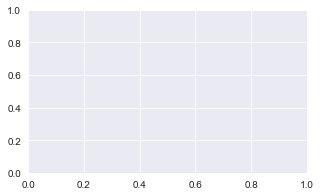

<Figure size 423.375x360 with 0 Axes>

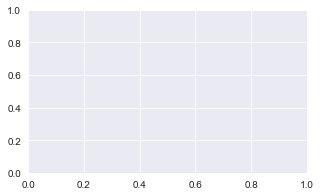

<Figure size 423.375x360 with 0 Axes>

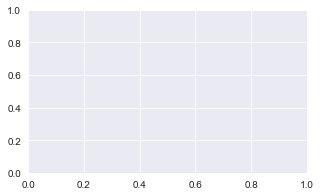

<Figure size 423.375x360 with 0 Axes>

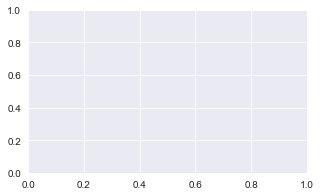

<Figure size 423.375x360 with 0 Axes>

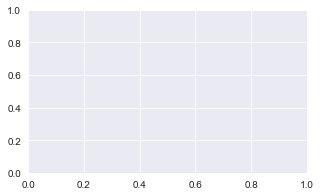

<Figure size 423.375x360 with 0 Axes>

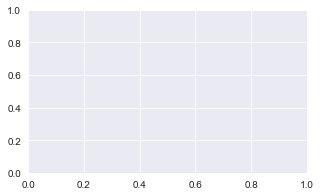

<Figure size 423.375x360 with 0 Axes>

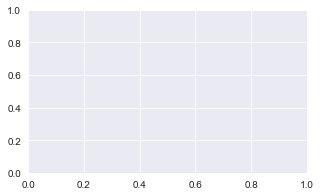

<Figure size 423.375x360 with 0 Axes>

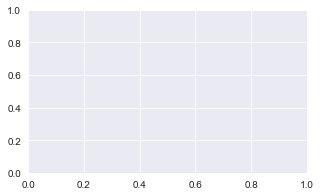

<Figure size 423.375x360 with 0 Axes>

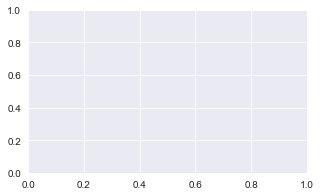

<Figure size 423.375x360 with 0 Axes>

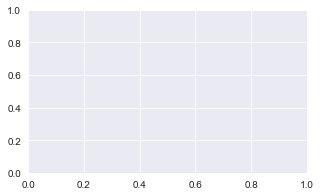

<Figure size 423.375x360 with 0 Axes>

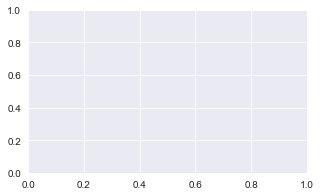

<Figure size 423.375x360 with 0 Axes>

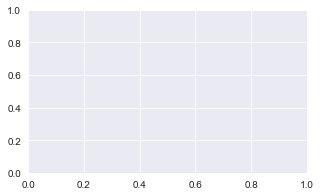

<Figure size 423.375x360 with 0 Axes>

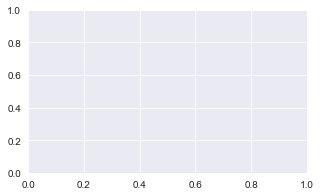

<Figure size 423.375x360 with 0 Axes>

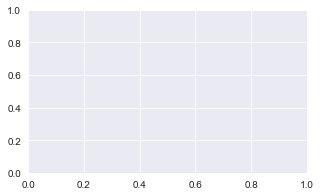

<Figure size 423.375x360 with 0 Axes>

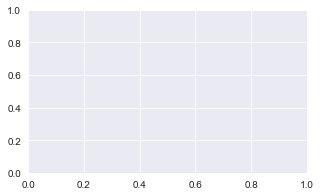

<Figure size 423.375x360 with 0 Axes>

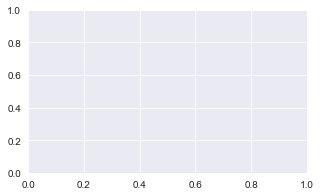

<Figure size 423.375x360 with 0 Axes>

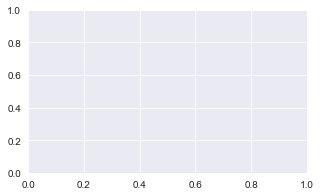

<Figure size 423.375x360 with 0 Axes>

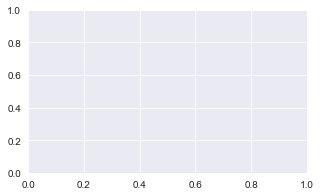

<Figure size 423.375x360 with 0 Axes>

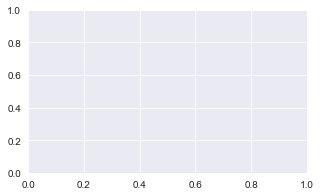

<Figure size 423.375x360 with 0 Axes>

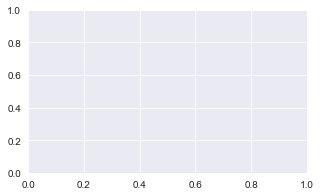

<Figure size 423.375x360 with 0 Axes>

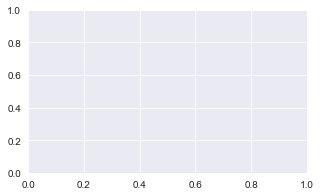

<Figure size 423.375x360 with 0 Axes>

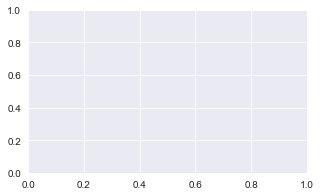

<Figure size 423.375x360 with 0 Axes>

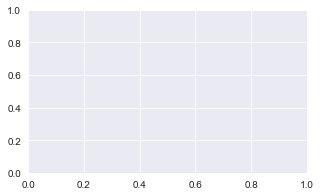

<Figure size 423.375x360 with 0 Axes>

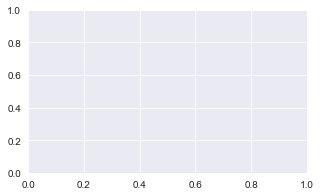

<Figure size 423.375x360 with 0 Axes>

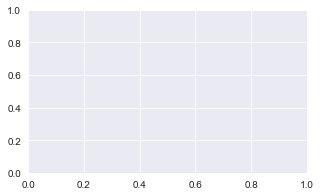

<Figure size 423.375x360 with 0 Axes>

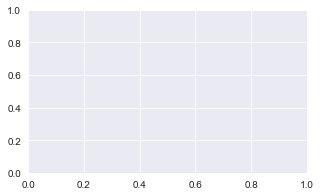

<Figure size 423.375x360 with 0 Axes>

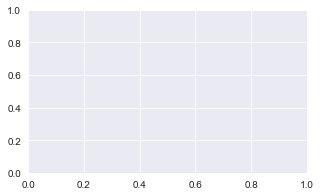

<Figure size 423.375x360 with 0 Axes>

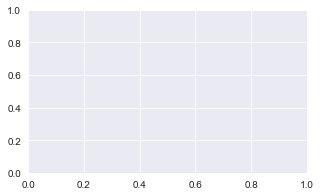

<Figure size 423.375x360 with 0 Axes>

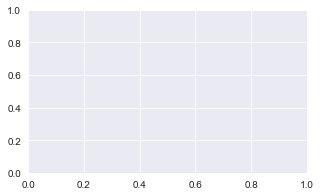

<Figure size 423.375x360 with 0 Axes>

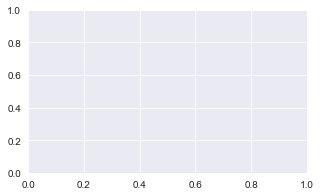

<Figure size 423.375x360 with 0 Axes>

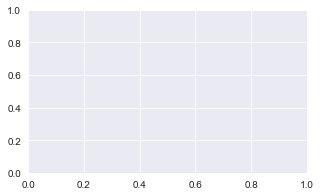

<Figure size 423.375x360 with 0 Axes>

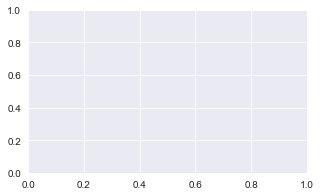

<Figure size 423.375x360 with 0 Axes>

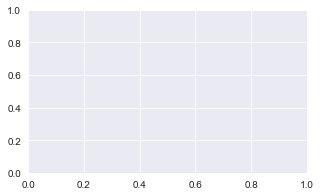

<Figure size 423.375x360 with 0 Axes>

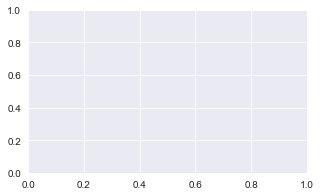

<Figure size 423.375x360 with 0 Axes>

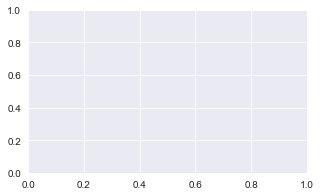

<Figure size 423.375x360 with 0 Axes>

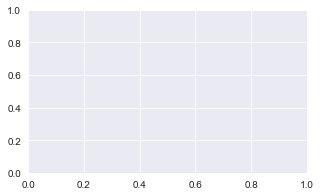

<Figure size 423.375x360 with 0 Axes>

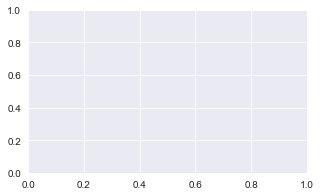

<Figure size 423.375x360 with 0 Axes>

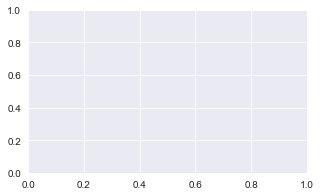

<Figure size 423.375x360 with 0 Axes>

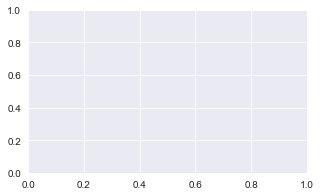

<Figure size 423.375x360 with 0 Axes>

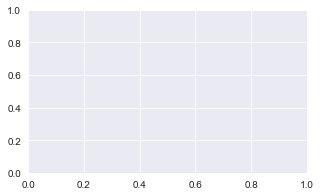

<Figure size 423.375x360 with 0 Axes>

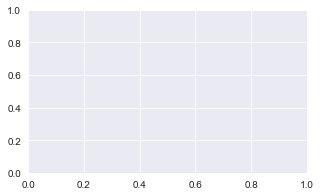

<Figure size 423.375x360 with 0 Axes>

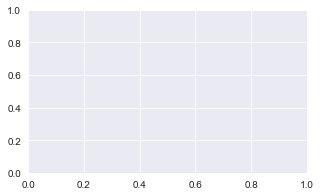

<Figure size 423.375x360 with 0 Axes>

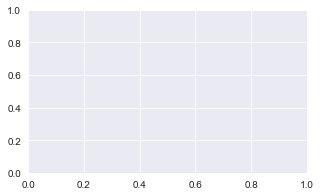

<Figure size 423.375x360 with 0 Axes>

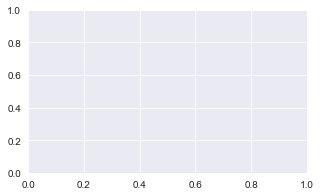

<Figure size 423.375x360 with 0 Axes>

In [83]:
for center in BIGGEST_CENTERS:
    for feature in feature_names:
        dist_binary(full_df, feature, center)

In [17]:
full_df["female"][full_df.StudySubjectID == "AZM"]

43     0
44     1
45     1
46     0
47     0
48     1
49     0
50     0
51     1
52     0
53     0
54     0
88     1
89     1
90     0
251    0
252    0
253    0
254    0
255    1
256    0
257    0
258    1
259    0
260    1
261    0
262    1
263    1
264    0
265    0
266    1
267    0
268    1
269    0
270    1
271    1
272    0
273    0
274    0
275    0
276    1
277    1
278    0
279    1
280    0
281    0
282    0
283    1
284    0
285    1
286    0
287    0
288    1
289    0
290    0
291    1
292    0
293    0
Name: female, dtype: int64

In [35]:
['female',
 'age',
 'r_ivtrom',
 'intra_arterial_treatment',
 'b_pvstr',
 'b_pvdm',
 'b_pvrr',
 'b_pvaf',
 'b_pvhc',
 'nihsco_abl_c',
 'StudySubjectID',
 'mrs_d90d_c']

0    60
1    34
Name: female, dtype: int64

In [35]:
BIGGEST_CENTERS = ["ANT",
                   "AMC",
                   "LUM",
                   "AZM",
                   "RIJ",
                   "MCH"]

def plot_binary_features():
    feature_names = ['female',
         'r_ivtrom',
         'intra_arterial_treatment',
         'b_pvstr',
         'b_pvdm',
         'b_pvrr',
         'b_pvaf',
         'b_pvhc',]

    for center in BIGGEST_CENTERS:
        print("center", center)

        zeros_center = [full_df.female[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts()[0],
                 full_df.r_ivtrom[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts()[0] if full_df.r_ivtrom[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts().size == 2 else 0,
                 full_df.intra_arterial_treatment[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts()[0],
                 full_df.b_pvstr[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts()[0],
                 full_df.b_pvdm[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts()[0],
                 full_df.b_pvrr[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts()[0],
                 full_df.b_pvaf[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts()[0],
                 full_df.b_pvhc[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ].value_counts()[0]
                 ]
        ones_center = [full_df.female[ (full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ].value_counts()[1],
                full_df.r_ivtrom[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ].value_counts()[1],
                full_df.intra_arterial_treatment[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ].value_counts()[1],
                full_df.b_pvstr[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ].value_counts()[1],
                full_df.b_pvdm[(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ].value_counts()[1],
                full_df.b_pvrr[( full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ].value_counts()[1],
                full_df.b_pvaf[( full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ].value_counts()[1],
                full_df.b_pvhc[( full_df.StudySubjectID == center) &(full_df.mrs_d90d_c == 1) ].value_counts()[1]
                ]

        x_axis_len = np.arange(len(feature_names))

        plt.bar(x_axis_len - 0.2, zeros_center, 0.4, label = '1')
        plt.bar(x_axis_len + 0.2, ones_center, 0.4, label = '0')

        plt.xticks(x_axis_len, feature_names)
        plt.xlabel("Features")
        plt.xticks(rotation=45, ha='right')
        plt.ylabel("Number of elements in feature")
        plt.title(f"Number of elements in each feature for center {center}")
        plt.legend()

        plt.savefig(f"./fig/bin-features/{center}.png",facecolor="white", pad_inches=0.3, bbox_inches="tight")
        plt.clf()


In [66]:
plot_binary_features()

center ANT
center AMC
center LUM
center AZM
center RIJ
center MCH


<Figure size 432x288 with 0 Axes>

In [1]:
sns.displot(full_df, x="age", hue="mrs_d90d_c", element="step")

NameError: name 'sns' is not defined

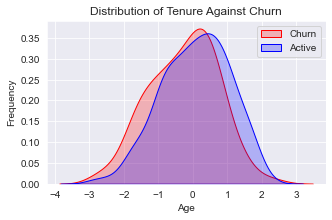

In [78]:
# tenure distibution
fig, ax=plt.subplots(1,1,figsize=(5,3))
g = sns.kdeplot(full_df.age[(full_df.mrs_d90d_c == 0) ], color="Red", shade = True)
g = sns.kdeplot(full_df.age[(full_df.mrs_d90d_c == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
plt.title('Distribution of Tenure Against Churn')
g = g.legend(["Churn","Active"])
plt.show()

In [76]:
full_df.index.has_duplicates


False

In [ ]:
def dist_binary(df, feature, center):

    print()

    fig, ax=plt.subplots(1,1,figsize=(5,3))
    g = sns.displot(df[feature][(df.StudySubjectID == center) & (full_df.mrs_d90d_c == 0) ], color="Red", shade=True)
    sns.displot(df, x=feature, hue="mrs_d90d_c", element="step")
    g = sns.displot(df[feature][(full_df.StudySubjectID == center) & (full_df.mrs_d90d_c == 1) ], ax=g, color="Blue", shade=True)
    g.set_xlabel(f"{feature}")
    g.set_ylabel("Frequency")
    plt.title(f'Distribution of {feature} Against 90d MRS for {center}')
    g = g.legend(["MRS 90d","Bad Outcome"])
    #plt.savefig(f"./fig/cat-features/nihss-{center}.png",facecolor="white", pad_inches=0.3, bbox_inches="tight")
    #plt.clf()
    plt.show()